# Documentation
## Intro
The dataset gives us a description of a wine with the taster, origin, points ranked, price, etc. The most interesting part is that of the taster name and the description that is given. Sentiment Analysis will be the main focus of this dataset, since we have that option.

## Documentation of steps I have taken
### 1
Changed all countries below the top 10 most counted to 'other' to group smaller countries together without losing valuable data
### 2
Removed all but the top 10 wines so that I have a more centralized data set, since many wines were unique and therefore hard to account for
### 3
Removed all Reviewers with below 50 reviews. Also attempted to remove Anne Krebiehl MW since for some reason her data cannot be accessed, but is clearly visible when doing groupby functions/
#### Note
Even after removing, her name still shows up and so does her scores and class scores. Her data cannot be accessed even when dataframe is first initiated
### 4
Made all description lower cases
### 5
Seperated into subsets for each reviewer, where each subset will be further split into training and test set. As well as the original set
### 6
Divided each subset in train and test, removing stop words from training, and using vector counter and 

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [56]:
df=pd.read_csv('winemag-data-130k-v2.csv')
# go back and use groupby to see means of taster
# groupby on country to see what each country has
# use heatmap and PCA to determine initial features that are important
# Fix null values to retain more data
# figure out a way to distiguish white wine and red wine
# use top 10 or so

In [57]:
df.sort_values('taster_name')
#convert to sparse matrix

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1836,1836,US,Grilled peach and almond notes show on the nos...,Dry,84,19.0,Michigan,Leelanau Peninsula,NaN,Alexander Peartree,NaN,Good Harbor 2011 Dry Riesling (Leelanau Penins...,Riesling,Good Harbor
119882,119882,US,"Inviting aromas of dark cherry, spicy bramble ...",NaN,88,22.0,Virginia,Virginia,NaN,Alexander Peartree,NaN,Annefield Vineyards 2012 Cabernet Franc (Virgi...,Cabernet Franc,Annefield Vineyards
79695,79695,US,Faint citrus and wilted floral aromas carry th...,NaN,82,20.0,Texas,Texas,NaN,Alexander Peartree,NaN,Fall Creek 2014 Chardonnay (Texas),Chardonnay,Fall Creek
79703,79703,US,A flabby nose of muddled citrus and bruised pe...,Reserve,82,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Pinot Grigio (Lake Mic...,Pinot Grigio,St. Julian
79706,79706,US,High-toned aromas of black cherry syrup and or...,Light Madeira,82,40.0,Texas,Texas,NaN,Alexander Peartree,NaN,Haak 2009 Light Madeira Jacquez (Texas),Jacquez,Haak
79713,79713,US,Pollen and wilted-flower tones are mild on the...,Side Saddle,80,20.0,Texas,Texas,NaN,Alexander Peartree,NaN,Fiesta Winery NV Side Saddle White (Texas),White Blend,Fiesta Winery
69767,69767,US,"Quite quinine and focused on the nose, underri...",Medium Sweet,86,15.0,Michigan,Old Mission Peninsula,NaN,Alexander Peartree,NaN,Bowers Harbor 2014 Medium Sweet Riesling (Old ...,Riesling,Bowers Harbor
79715,79715,US,SweeTART candies and green Jolly Rancher aroma...,Skinny Dippin,80,16.0,Texas,Texas,NaN,Alexander Peartree,NaN,Fiesta Winery NV Skinny Dippin White (Texas),White Blend,Fiesta Winery
69770,69770,US,This single-vineyard offering from northern Mi...,Proprietor's Reserve Krupka Vineyard,86,26.0,Michigan,Old Mission Peninsula,NaN,Alexander Peartree,NaN,Chateau Chantal 2012 Proprietor's Reserve Krup...,Cabernet Franc,Chateau Chantal
7959,7959,US,Pink grapefruit and lemon rind notes are eleva...,NaN,86,14.0,Virginia,Monticello,NaN,Alexander Peartree,NaN,Trump 2014 Rosé (Monticello),Rosé,Trump


In [58]:
taster_mean=df[['points','price','taster_name']].groupby('taster_name').mean()
taster_mean.index.values
# normalize and process text

array(['Alexander Peartree', 'Anna Lee C. Iijima', 'Anne Krebiehl\xa0MW',
       'Carrie Dykes', 'Christina Pickard', 'Fiona Adams', 'Jeff Jenssen',
       'Jim Gordon', 'Joe Czerwinski', 'Kerin O’Keefe', 'Lauren Buzzeo',
       'Matt Kettmann', 'Michael Schachner', 'Mike DeSimone',
       'Paul Gregutt', 'Roger Voss', 'Sean P. Sullivan',
       'Susan Kostrzewa', 'Virginie Boone'], dtype=object)

In [59]:
df[df['taster_name']=='Anne Krebiehl\xa0MW']

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
93,93,Austria,"Freshness characterizes the nose: green pear, ...",NaN,88,12.0,Burgenland,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Fuchs 2015 Grüner Veltliner (Burgenland),Grüner Veltliner,Fuchs
340,340,France,"The nose is muted, despite the slight spritz o...",Tradition,82,18.0,Alsace,Alsace,NaN,Anne Krebiehl MW,@AnneInVino,Antoine Moltès & Fils 2015 Tradition Pinot Gri...,Pinot Gris,Antoine Moltès & Fils
423,423,Austria,"There is a savory, fragrant, mossy greenness t...",Kittl,89,23.0,Weinviertel,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Kohl 2015 Kittl Grüner Veltliner (Weinviertel),Grüner Veltliner,Kohl
428,428,Austria,An earthy hint colors the pear notes which on ...,Crazy Creatures,89,17.0,Kremstal,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Malat 2015 Crazy Creatures Grüner Veltliner (K...,Grüner Veltliner,Malat
435,435,Austria,Creamy notes pear crumble make for a most attr...,Lage Modler,89,NaN,Thermenregion,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Gebeshuber 2015 Lage Modler Zierfandler (Therm...,Zierfandler,Gebeshuber
441,441,Austria,Tender notes of red apple skin and bottled str...,Rosé,89,12.0,Niederösterreich,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Winzer Krems 2015 Rosé Zweigelt (Niederösterre...,Zweigelt,Winzer Krems
444,444,Austria,"Earthy, savory notes of yeast and miso swing a...",Altweingarten,88,12.0,Wagram,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Eschenhof Holzer 2015 Altweingarten Grüner Vel...,Grüner Veltliner,Eschenhof Holzer
584,584,Austria,"That herbal, yeasty tang of Grüner is on displ...",NaN,89,18.0,Kamptal,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Steininger 2016 Grüner Veltliner (Kamptal),Grüner Veltliner,Steininger
586,586,Austria,Although a flinty touch of reduction still han...,Classic,89,18.0,Steiermark,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Strauss 2016 Classic Pinot Blanc (Steiermark),Pinot Blanc,Strauss
587,587,Austria,Notes of tart lemon peel appear on the nose. T...,Classic,89,20.0,Südsteiermark,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Strauss 2016 Classic Sauvignon Blanc (Südsteie...,Sauvignon Blanc,Strauss


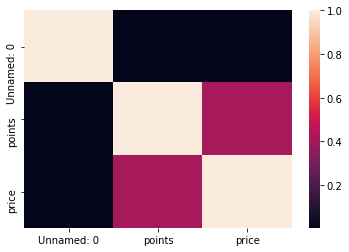

In [60]:
corrmat = df.corr()
sns.heatmap(corrmat)

### Further analysis of the mean points and price for each taste
one or both of these values could be used to replace the string variable of the taster in order to input into future model

In [61]:
df.groupby('country').count().sort_values('winery',ascending=False)

,Unnamed: 0,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
country,,,,,,,,,,,,,
US,54504,54504,36908,54504,54265,54504,54226,50511,37730,34741,54504,54504,54504
France,22093,22093,14530,22093,17776,22093,22017,0,21828,21828,22093,22093,22093
Italy,19540,19540,13889,19540,16914,19540,19513,0,11042,11042,19540,19540,19540
Spain,6645,6645,5320,6645,6573,6645,6637,0,6581,6581,6645,6645,6645
Portugal,5691,5691,5105,5691,4875,5691,0,0,5686,5686,5691,5691,5691
Chile,4472,4472,3879,4472,4416,4472,0,0,4361,4361,4472,4471,4472
Argentina,3800,3800,2902,3800,3756,3800,3747,0,3797,3797,3800,3800,3800
Austria,3345,3345,2825,3345,2799,3345,0,0,3337,3337,3345,3345,3345
Australia,2329,2329,1640,2329,2294,2329,2327,0,2037,2037,2329,2329,2329


In [62]:
country_list=df.groupby('country').count().sort_values('winery',ascending=False)
country_list.index[:10]

Index(['US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Argentina',
       'Austria', 'Australia', 'Germany'],
      dtype='object', name='country')

### Countries analysis
Through the same means we can modify countries that have inadequete data

For the most accurate data I will be focusing on the top 10 countries
1. US
2. France
3. Italy
4. Spain
5. Portugal
6. Chile
7. Argentina
8. Austria
9. Australia
10. Germany

And creating the Country 'other' to represent all other Countries

In [63]:
df['country']=np.where(df['country'].isin(country_list.index[:10]),df['country'],'other')

In [64]:
df.groupby('country').count().sort_values('winery',ascending=False)

,Unnamed: 0,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
country,,,,,,,,,,,,,
US,54504,54504,36908,54504,54265,54504,54226,50511,37730,34741,54504,54504,54504
France,22093,22093,14530,22093,17776,22093,22017,0,21828,21828,22093,22093,22093
Italy,19540,19540,13889,19540,16914,19540,19513,0,11042,11042,19540,19540,19540
Spain,6645,6645,5320,6645,6573,6645,6637,0,6581,6581,6645,6645,6645
Portugal,5691,5691,5105,5691,4875,5691,0,0,5686,5686,5691,5691,5691
other,5387,5387,3502,5387,5187,5324,257,0,5194,4973,5387,5387,5387
Chile,4472,4472,3879,4472,4416,4472,0,0,4361,4361,4472,4471,4472
Argentina,3800,3800,2902,3800,3756,3800,3747,0,3797,3797,3800,3800,3800
Austria,3345,3345,2825,3345,2799,3345,0,0,3337,3337,3345,3345,3345


In [65]:
df.groupby('variety').count().sort_values('winery',ascending=False)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,winery
variety,,,,,,,,,,,,,
Pinot Noir,13272,13272,13272,9893,13272,12787,13269,12118,9036,10319,10106,13272,13272
Chardonnay,11753,11753,11753,7843,11753,11080,11750,10712,6404,8943,8585,11753,11753
Cabernet Sauvignon,9472,9472,9472,5801,9472,9386,9470,8343,7102,6271,6162,9472,9472
Red Blend,8946,8946,8946,7457,8946,8476,8935,7972,2706,7109,7003,8946,8946
Bordeaux-style Red Blend,6915,6915,6915,3654,6915,5340,6915,6685,1716,6390,6274,6915,6915
Riesling,5189,5189,5189,4394,5189,4972,5188,2679,1603,4935,2772,5189,5189
Sauvignon Blanc,4967,4967,4967,2866,4967,4783,4963,3302,1939,4020,3936,4967,4967
Syrah,4142,4142,4142,3066,4142,4086,4142,3653,3132,3140,3112,4142,4142
Rosé,3564,3564,3564,2504,3564,3262,3563,3103,825,3315,3147,3564,3564


In [66]:
wine_list=df.groupby('variety').count().sort_values('winery',ascending=False)
wine_list.index[:10]

Index(['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend',
       'Bordeaux-style Red Blend', 'Riesling', 'Sauvignon Blanc', 'Syrah',
       'Rosé', 'Merlot'],
      dtype='object', name='variety')

### Variety of wine
Now we can do the same method of shrinking to the wines

We will be using the top 10 wines
1. Pinot Noir
2. Cabernet Sauvignon
3. Chardonnay
4. Syrah
5. Red Blend
6. Zinfandel
7. Merlot
8. Sauvignon Blanc
9. Bordeaux-style Red Blend
10. Riesling

In [67]:
df=df[df['variety'].isin(wine_list.index[:10])]

In [68]:
df.groupby('variety').count().sort_values('winery',ascending=False)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,winery
variety,,,,,,,,,,,,,
Pinot Noir,13272,13272,13272,9893,13272,12787,13269,12118,9036,10319,10106,13272,13272
Chardonnay,11753,11753,11753,7843,11753,11080,11750,10712,6404,8943,8585,11753,11753
Cabernet Sauvignon,9472,9472,9472,5801,9472,9386,9470,8343,7102,6271,6162,9472,9472
Red Blend,8946,8946,8946,7457,8946,8476,8935,7972,2706,7109,7003,8946,8946
Bordeaux-style Red Blend,6915,6915,6915,3654,6915,5340,6915,6685,1716,6390,6274,6915,6915
Riesling,5189,5189,5189,4394,5189,4972,5188,2679,1603,4935,2772,5189,5189
Sauvignon Blanc,4967,4967,4967,2866,4967,4783,4963,3302,1939,4020,3936,4967,4967
Syrah,4142,4142,4142,3066,4142,4086,4142,3653,3132,3140,3112,4142,4142
Rosé,3564,3564,3564,2504,3564,3262,3563,3103,825,3315,3147,3564,3564


In [69]:
df.groupby('taster_name').count().sort_values('country')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_twitter_handle,title,variety,winery
taster_name,,,,,,,,,,,,,
Christina Pickard,3,3,3,0,3,3,3,3,3,3,3,3,3
Fiona Adams,11,11,11,6,11,11,11,9,0,11,11,11,11
Carrie Dykes,67,67,67,51,67,66,67,67,0,0,67,67,67
Alexander Peartree,187,187,187,136,187,186,187,181,0,0,187,187,187
Jeff Jenssen,237,237,237,189,237,237,227,0,0,237,237,237,237
Mike DeSimone,282,282,282,232,282,275,279,0,0,282,282,282,282
Susan Kostrzewa,505,505,505,324,505,499,503,163,115,505,505,505,505
Lauren Buzzeo,1035,1035,1035,680,1035,963,1032,312,17,1035,1035,1035,1035
Anne Krebiehl MW,1278,1278,1278,1138,1278,1190,1276,558,0,1278,1278,1278,1278


In [70]:
taster_list=df.groupby('taster_name').count().sort_values('country')
taster_list.index[3:]

Index(['Alexander Peartree', 'Jeff Jenssen', 'Mike DeSimone',
       'Susan Kostrzewa', 'Lauren Buzzeo', 'Anne Krebiehl MW', 'Jim Gordon',
       'Kerin O’Keefe', 'Joe Czerwinski', 'Anna Lee C. Iijima',
       'Sean P. Sullivan', 'Matt Kettmann', 'Michael Schachner',
       'Paul Gregutt', 'Virginie Boone', 'Roger Voss'],
      dtype='object', name='taster_name')

### Taster analysis
With count we can determine which tasters we can remove due to having too little data

Here we will remove:
1. Christina Pickard
2. Fiona Adams
3. Carrie Dykes
Note: Anne Krebiehl was added due to being unable to access her information

In [71]:
# and creble
# use list and lambda
# never hardcode text
# dont copy lines
df = df[df['taster_name'].isin(taster_list.index[3:])]

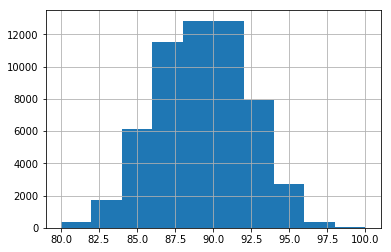

In [72]:
df['points'].hist()
#maybe regression

In [73]:
df.groupby('taster_name').count().sort_values('winery')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_twitter_handle,title,variety,winery
taster_name,,,,,,,,,,,,,
Alexander Peartree,187,187,187,136,187,186,187,181,0,0,187,187,187
Jeff Jenssen,237,237,237,189,237,237,227,0,0,237,237,237,237
Mike DeSimone,282,282,282,232,282,275,279,0,0,282,282,282,282
Susan Kostrzewa,505,505,505,324,505,499,503,163,115,505,505,505,505
Lauren Buzzeo,1035,1035,1035,680,1035,963,1032,312,17,1035,1035,1035,1035
Anne Krebiehl MW,1278,1278,1278,1138,1278,1190,1276,558,0,1278,1278,1278,1278
Jim Gordon,2460,2460,2460,1525,2460,2456,2460,2455,1691,2460,2460,2460,2460
Kerin O’Keefe,2798,2798,2798,1945,2798,2643,2798,2794,0,2798,2798,2798,2798
Joe Czerwinski,3047,3047,3047,1924,3047,2957,3047,1477,84,3047,3047,3047,3047


In [74]:
import nltk
#nltk.download('averaged_perceptron_tagger')
#nltk.download('punkt')
#nltk.download('stopwords')

In [75]:
sentiment_features=pd.DataFrame()

In [76]:
sentiment_features['tokenize']=df['description']
sentiment_features['tokenize']=sentiment_features['tokenize'].str.lower()
sentiment_features['taster_name']=df['taster_name']

In [77]:
sentiment_features['class']=np.where(df['points']>df['points'].mean(),1,0)
sentiment_features['points']=df['points']

In [78]:
sentiment_features

,tokenize,taster_name,class,points
3,"pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,0,87
4,"much like the regular bottling from 2012, this...",Paul Gregutt,0,87
10,"soft, supple plum envelopes an oaky structure ...",Virginie Boone,0,87
12,"slightly reduced, this wine offers a chalky, t...",Virginie Boone,0,87
14,building on 150 years and six generations of w...,Matt Kettmann,0,87
15,zesty orange peels and apple notes abound in t...,Anna Lee C. Iijima,0,87
20,ripe aromas of dark berries mingle with ample ...,Alexander Peartree,0,87
21,"a sleek mix of tart berry, stem and herb, alon...",Paul Gregutt,0,87
23,this wine from the geneseo district offers aro...,Matt Kettmann,0,87
25,oak and earth intermingle around robust aromas...,Virginie Boone,0,87


In [79]:
sentiment_features.isnull().sum()

tokenize       0
taster_name    0
class          0
points         0
dtype: int64

In [80]:
sentiment_features.groupby('taster_name').mean()

,class,points
taster_name,,
Alexander Peartree,0.080214,86.000000
Anna Lee C. Iijima,0.519046,88.722515
Anne Krebiehl MW,0.862285,91.062598
Jeff Jenssen,0.476793,87.940928
Jim Gordon,0.486992,88.479675
Joe Czerwinski,0.494257,88.384312
Kerin O’Keefe,0.482130,88.678342
Lauren Buzzeo,0.344928,87.550725
Matt Kettmann,0.698138,90.189938


In [81]:
from sklearn.model_selection import train_test_split

# Create Sentiment analysis training and test set

Will be making an assamble model for individual tasters and general tasters

In [82]:
Training_Dic={}
Test_Dic={}
names_array=taster_list.index[3:]

In [83]:
for name in names_array:
    print(name)

Alexander Peartree
Jeff Jenssen
Mike DeSimone
Susan Kostrzewa
Lauren Buzzeo
Anne Krebiehl MW
Jim Gordon
Kerin O’Keefe
Joe Czerwinski
Anna Lee C. Iijima
Sean P. Sullivan
Matt Kettmann
Michael Schachner
Paul Gregutt
Virginie Boone
Roger Voss


In [84]:
for name in names_array:
    Training_Dic[name],Test_Dic[name] = train_test_split(sentiment_features[sentiment_features['taster_name']==name], train_size=.80)

In [85]:
Train_set, Test_set = train_test_split(sentiment_features, train_size=.80)

In [86]:
from nltk.corpus import stopwords


In [87]:
stop = stopwords.words('english')

In [88]:
for name in names_array:
    Training_Dic[name].tokenize=Training_Dic[name].tokenize.str.split()

In [89]:
Train_set['tokenize']=Train_set['tokenize'].str.split()

C:\Users\FAMILY\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
for name in names_array:
    Training_Dic[name].tokenize=Training_Dic[name].tokenize.apply(lambda x: [item for item in x if item not in stop])

In [91]:
Train_set['tokenize']=Train_set['tokenize'].apply(lambda x: [item for item in x if item not in stop])

C:\Users\FAMILY\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
from nltk.stem.snowball import SnowballStemmer

In [93]:
stemmer = SnowballStemmer("english")
print(stemmer.stem("governmental"))

government


In [94]:
for name in names_array:
    Training_Dic[name].tokenize=Training_Dic[name].tokenize.apply(lambda x:[stemmer.stem(item) for item in x])

In [95]:
Train_set['tokenize']=Train_set['tokenize'].apply(lambda x:[stemmer.stem(item) for item in x])

C:\Users\FAMILY\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
for name in names_array:
    Training_Dic[name].tokenize=Training_Dic[name].tokenize.str.join(" ")

In [97]:
Train_set['tokenize']=Train_set['tokenize'].str.join(" ")

C:\Users\FAMILY\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
Train_set

,tokenize,taster_name,class,points
56708,"aroma matchstick, herb, vanilla cinnamon follo...",Sean P. Sullivan,0,87
38017,burst glass almost smoki miner aroma nice comp...,Joe Czerwinski,0,87
37441,"tannic, brambly, earthi wine, pure red mountai...",Paul Gregutt,1,91
32601,complic aroma flavor blend santa barbara count...,Matt Kettmann,0,87
12159,"top wine balland, base coteaux du giennoi nort...",Roger Voss,1,91
111639,"made 90% nero d'avola 10% nocera, open earthi ...",Kerin O’Keefe,0,87
123856,flavor spectrum emphas grapefruit kiwi make li...,Jim Gordon,1,89
23659,"matur select now, offer initi scent cantaloupe...",Lauren Buzzeo,1,89
118078,high-ton acid lend raci otherwis fleshi dri ri...,Anna Lee C. Iijima,1,93
37566,"aroma underbrush, prune toast whiff crush blue...",Kerin O’Keefe,0,88


In [99]:
from sklearn.feature_extraction.text import CountVectorizer

In [100]:
count_vect_Dic={}
X_train_counts_Dic={}
for name in names_array:
    count_vect_Dic[name]=CountVectorizer()
    X_train_counts_Dic[name]=count_vect_Dic[name].fit_transform(Training_Dic[name].tokenize)

In [101]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(Train_set.tokenize)
X_train_counts.shape
count_vect.vocabulary_

{'aroma': 1151,
 'matchstick': 9883,
 'herb': 7727,
 'vanilla': 17244,
 'cinnamon': 3327,
 'follow': 6419,
 'creamy': 4185,
 'feel': 6063,
 'palat': 11550,
 'equal': 5628,
 'mix': 10332,
 'fruit': 6694,
 'barrel': 1515,
 'flavors': 6291,
 'tannin': 15992,
 'seem': 14202,
 'bit': 1845,
 'bunch': 2482,
 'up': 17151,
 'burst': 2522,
 'glass': 7045,
 'almost': 780,
 'smoki': 14797,
 'miner': 10257,
 'nice': 10880,
 'complement': 3707,
 'lime': 9266,
 'scents': 14044,
 'flavor': 6286,
 'riper': 13492,
 'resembl': 13290,
 'peach': 11720,
 'apple': 1052,
 'touch': 16502,
 'sweet': 15837,
 'that': 16227,
 'balanc': 1434,
 'chalki': 3003,
 'note': 10994,
 'finish': 6202,
 'tannic': 15991,
 'brambly': 2208,
 'earthi': 5246,
 'wine': 17912,
 'pure': 12756,
 'red': 13094,
 'mountain': 10529,
 'syrah': 15886,
 'kept': 8763,
 'neutral': 10852,
 'oak': 11067,
 'minim': 10272,
 'racked': 12908,
 'first': 6236,
 'show': 14483,
 'tart': 16037,
 'character': 3069,
 'begin': 1669,
 'emerg': 5444,
 'love':

In [102]:
from sklearn.feature_extraction.text import TfidfTransformer

In [103]:
tfidf_transformer_Dic={}
X_train_tfidf_Dic={}

for name in names_array:
    tfidf_transformer_Dic[name]=TfidfTransformer()
    X_train_tfidf_Dic[name]=tfidf_transformer_Dic[name].fit_transform(X_train_counts_Dic[name])

In [104]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(45168, 18199)

In [105]:
#tfidf_df=pd.DataFrame(X_train_tfidf.todense())

In [106]:
#tfidf_df['taster_name']=Train_set['taster_name']
results_df=pd.DataFrame()

In [107]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold

In [108]:
kf = KFold(n_splits=3)
sum = 0
for train, test in kf.split(data):
    train_data = np.array(data)[train]
    test_data = np.array(data)[test]
    nb = nltk.NaiveBayesClassifier.train(train_data)
    sum += nltk.classify.accuracy(classifier, test_data)
average = sum/3

NameError: name 'data' is not defined

In [112]:
Naive_Dic={}
for name in names_array:
    Naive_Dic[name]=MultinomialNB()
    Naive_Dic[name].fit(X_train_tfidf_Dic[name], Training_Dic[name]['class'])

In [113]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, Train_set['class'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [114]:
# side by side comparisons
# split up by reveiw from whole model
# or take aggregate scores from submodels into one model
for name in names_array:
    print(name+" training score")
    print(Naive_Dic[name].score(X_train_tfidf_Dic[name], Training_Dic[name]['class']))
    print("--------------------")

Alexander Peartree training score
0.9194630872483222
--------------------
Jeff Jenssen training score
0.91005291005291
--------------------
Mike DeSimone training score
0.8044444444444444
--------------------
Susan Kostrzewa training score
0.8341584158415841
--------------------
Lauren Buzzeo training score
0.8768115942028986
--------------------
Anne Krebiehl MW training score
0.8610567514677103
--------------------
Jim Gordon training score
0.9009146341463414
--------------------
Kerin O’Keefe training score
0.886058981233244
--------------------
Joe Czerwinski training score
0.9031596224866639
--------------------
Anna Lee C. Iijima training score
0.8706929926442122
--------------------
Sean P. Sullivan training score
0.890870185449358
--------------------
Matt Kettmann training score
0.772236076475478
--------------------
Michael Schachner training score
0.8858131487889274
--------------------
Paul Gregutt training score
0.858269127396524
--------------------
Virginie Boone trainin

In [115]:
print("Total Score")
print(nb.score(X_train_tfidf, Train_set['class']))

Total Score
0.824654622741764


In [116]:
X_test_counts_Dic={}
X_test_tfidf_Dic={}
for name in names_array:
    X_test_counts_Dic[name]=count_vect_Dic[name].transform(Test_Dic[name].tokenize)
    X_test_tfidf_Dic[name]=tfidf_transformer_Dic[name].transform(X_test_counts_Dic[name])

In [117]:
X_test_counts = count_vect.transform(Test_set.tokenize)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_test_tfidf.shape

(11292, 18199)

In [118]:
predict_Dic={}
for name in names_array:
    predict_Dic[name]=Naive_Dic[name].predict(X_test_tfidf_Dic[name])

In [119]:
predict = nb.predict(X_test_tfidf)

In [120]:
from sklearn import metrics

In [121]:
for name in names_array:
    print(name+" Test Score")
    print(metrics.accuracy_score(Test_Dic[name]['class'], predict_Dic[name]))
    print("-------------------")
    
metrics.accuracy_score(Test_Dic[name]['class'], predict_Dic[name])
                # compare apples to apples

Alexander Peartree Test Score
0.9210526315789473
-------------------
Jeff Jenssen Test Score
0.75
-------------------
Mike DeSimone Test Score
0.7894736842105263
-------------------
Susan Kostrzewa Test Score
0.7722772277227723
-------------------
Lauren Buzzeo Test Score
0.7874396135265701
-------------------
Anne Krebiehl MW Test Score
0.87109375
-------------------
Jim Gordon Test Score
0.7032520325203252
-------------------
Kerin O’Keefe Test Score
0.8035714285714286
-------------------
Joe Czerwinski Test Score
0.7459016393442623
-------------------
Anna Lee C. Iijima Test Score
0.804953560371517
-------------------
Sean P. Sullivan Test Score
0.7934472934472935
-------------------
Matt Kettmann Test Score
0.7375415282392026
-------------------
Michael Schachner Test Score
0.806346623270952
-------------------
Paul Gregutt Test Score
0.7414040114613181
-------------------
Virginie Boone Test Score
0.7512229210342418
-------------------
Roger Voss Test Score
0.758673274876096
-----

0.758673274876096

In [122]:
print("Total Test Set Score:")
print(metrics.accuracy_score(Test_set['class'], predict))

Total Test Set Score:
0.7650549061282323


In [123]:
matrix_main=np.array([[0,0],[0,0]])
for name in names_array:
    print(name+" Confusion Matrix")
    print(metrics.confusion_matrix(Test_Dic[name]['class'], predict_Dic[name]))
    matrix_main=matrix_main+metrics.confusion_matrix(Test_Dic[name]['class'], predict_Dic[name])
    print("-----------------------")
    
print(matrix_main)

Alexander Peartree Confusion Matrix
[[35  0]
 [ 3  0]]
-----------------------
Jeff Jenssen Confusion Matrix
[[16  3]
 [ 9 20]]
-----------------------
Mike DeSimone Confusion Matrix
[[ 1 12]
 [ 0 44]]
-----------------------
Susan Kostrzewa Confusion Matrix
[[78  0]
 [23  0]]
-----------------------
Lauren Buzzeo Confusion Matrix
[[128   2]
 [ 42  35]]
-----------------------
Anne Krebiehl MW Confusion Matrix
[[  0  33]
 [  0 223]]
-----------------------
Jim Gordon Confusion Matrix
[[129 130]
 [ 16 217]]
-----------------------
Kerin O’Keefe Confusion Matrix
[[266  29]
 [ 81 184]]
-----------------------
Joe Czerwinski Confusion Matrix
[[252  49]
 [106 203]]
-----------------------
Anna Lee C. Iijima Confusion Matrix
[[228  77]
 [ 49 292]]
-----------------------
Sean P. Sullivan Confusion Matrix
[[304  38]
 [107 253]]
-----------------------
Matt Kettmann Confusion Matrix
[[ 20 233]
 [  4 646]]
-----------------------
Michael Schachner Confusion Matrix
[[928   0]
 [238  63]]
-------

In [124]:
a,b=matrix_main.shape
print(a)

2


In [125]:
metrics.confusion_matrix(Test_set['class'], predict)
#matrix_gen=metrics.confusion_matrix(Test_set['class'], predict)
#compare the two matrices
# individual matrix
# break gen matrix to individual matrix
# try different models
# Grid Search CV
# aveage across all the folds
# cross validation

array([[3493, 1956],
       [ 697, 5146]], dtype=int64)

In [126]:
#[[TN,FP],
#[FN,TP]]

In [127]:
def matrix_accuracy(matrix):
    a,b=matrix.shape
    true_values=0
    all_values=0
    for count in range(a):
        for counts in range(b):
            all_values=all_values+matrix[count][counts]
            if(count==counts):
                true_values=true_values+matrix[count][counts]
    return(true_values/all_values)

In [128]:
def matrix_percision(matrix):
    return(matrix[1][1]/(matrix[1][1]+matrix[0][1]))

In [129]:
def matrix_recall(matrix):
    return(matrix[1][1]/(matrix[1][1]+matrix[1][0]))

In [130]:
def matrix_f1(matrix):
    return(2*(matrix_percision(matrix)*matrix_recall(matrix))/(matrix_percision(matrix)+matrix_recall(matrix)))

## Testing the different methods on naive bayes
### Individuals versus general model
#### General accuracy
Interestingly the individuals achieved a slightly higher accuracy score over the general model. The way this was tested is by confusion matrix, in order to account for the various sizes of samples throughout the model
#### General precision

In [131]:
Results_DF = pd.DataFrame(columns=['General_Class','Divided_Class','Difference_Class'])

In [132]:
Results_DF = Results_DF.append({'General_Class' : metrics.accuracy_score(Test_set['class'], predict) , 'Divided_Class' : matrix_accuracy(matrix_main), 'Difference_Class': (metrics.accuracy_score(Test_set['class'], predict)-matrix_accuracy(matrix_main))} , ignore_index=True)

In [133]:
Results_DF = Results_DF.append({'General_Class' : metrics.precision_score(Test_set['class'], predict) , 'Divided_Class' : matrix_percision(matrix_main), 'Difference_Class': (metrics.precision_score(Test_set['class'], predict)-matrix_percision(matrix_main))} , ignore_index=True)

In [134]:
Results_DF = Results_DF.append({'General_Class' : metrics.recall_score(Test_set['class'],predict) , 'Divided_Class' : matrix_recall(matrix_main), 'Difference_Class': (metrics.recall_score(Test_set['class'],predict)-matrix_recall(matrix_main))} , ignore_index=True)

In [135]:
Results_DF = Results_DF.append({'General_Class' : metrics.f1_score(Test_set['class'],predict) , 'Divided_Class' : matrix_f1(matrix_main), 'Difference_Class': (metrics.f1_score(Test_set['class'],predict)-matrix_f1(matrix_main))} , ignore_index=True)

In [136]:
Results_DF.index=['Accuracy','Precision','Recall','F1']

In [137]:
Results_DF

,General_Class,Divided_Class,Difference_Class
Accuracy,0.765055,0.766882,-0.001827
Precision,0.724585,0.778597,-0.054013
Recall,0.880712,0.771715,0.108997
F1,0.795056,0.775141,0.019915


### dividing general sets into individual subsets

In [138]:
Div_Acc_DF=pd.DataFrame(columns=['General_Acc','Divided_Acc','Difference_Acc'])

In [139]:
subgroup_Dic={}
for names in names_array:
    subgroup_Dic[names]=Test_set[Test_set['taster_name']==names]

In [140]:
subgroup_class_Dic={}
for names in names_array:
    subgroup_class_Dic[names]=subgroup_Dic[names]['class']
    subgroup_Dic[names]=count_vect.transform(subgroup_Dic[names].tokenize)
    subgroup_Dic[names]=tfidf_transformer.transform(subgroup_Dic[names])
    subgroup_Dic[names]=nb.predict(subgroup_Dic[names])

In [141]:
for names in names_array:
    print(names+'General confusion matrix')
    print(metrics.confusion_matrix(subgroup_class_Dic[names], subgroup_Dic[names]))
    print("--------------------------")

Alexander PeartreeGeneral confusion matrix
[[26 14]
 [ 0  1]]
--------------------------
Jeff JenssenGeneral confusion matrix
[[13 11]
 [ 4 14]]
--------------------------
Mike DeSimoneGeneral confusion matrix
[[ 2 13]
 [ 2 40]]
--------------------------
Susan KostrzewaGeneral confusion matrix
[[56 19]
 [ 2 20]]
--------------------------
Lauren BuzzeoGeneral confusion matrix
[[120  38]
 [ 11  60]]
--------------------------
Anne Krebiehl MWGeneral confusion matrix
[[ 23  16]
 [ 18 209]]
--------------------------
Jim GordonGeneral confusion matrix
[[175  78]
 [ 42 219]]
--------------------------
Kerin O’KeefeGeneral confusion matrix
[[203  83]
 [ 14 237]]
--------------------------
Joe CzerwinskiGeneral confusion matrix
[[223 112]
 [ 56 234]]
--------------------------
Anna Lee C. IijimaGeneral confusion matrix
[[156 143]
 [ 34 279]]
--------------------------
Sean P. SullivanGeneral confusion matrix
[[211  88]
 [ 63 313]]
--------------------------
Matt KettmannGeneral confusion ma

In [142]:
print("Subgroup of General   Specific group   Difference in Sets")
for names in names_array:
    Div_Acc_DF=Div_Acc_DF.append({
        'General_Acc': matrix_accuracy(metrics.confusion_matrix(subgroup_class_Dic[names], subgroup_Dic[names])),
        'Divided_Acc': matrix_accuracy(metrics.confusion_matrix(Test_Dic[names]['class'], predict_Dic[names])),
        'Difference_Acc': matrix_accuracy(metrics.confusion_matrix(subgroup_class_Dic[names], subgroup_Dic[names]))-matrix_accuracy(metrics.confusion_matrix(Test_Dic[names]['class'], predict_Dic[names]))}, ignore_index=True)

Subgroup of General   Specific group   Difference in Sets


In [143]:
Div_Acc_DF.index=names_array

In [144]:
Div_Acc_DF

,General_Acc,Divided_Acc,Difference_Acc
taster_name,,,
Alexander Peartree,0.658537,0.921053,-0.262516
Jeff Jenssen,0.642857,0.750000,-0.107143
Mike DeSimone,0.736842,0.789474,-0.052632
Susan Kostrzewa,0.783505,0.772277,0.011228
Lauren Buzzeo,0.786026,0.787440,-0.001413
Anne Krebiehl MW,0.872180,0.871094,0.001087
Jim Gordon,0.766537,0.703252,0.063285
Kerin O’Keefe,0.819367,0.803571,0.015795
Joe Czerwinski,0.731200,0.745902,-0.014702


In [145]:
Div_Per_DF=pd.DataFrame(columns=['General_Per','Divided_Per','Difference_Per'])

In [146]:
print("Subgroup of General   Specific group   Difference in Sets")
for names in names_array:
    Div_Per_DF=Div_Per_DF.append({
        'General_Per': matrix_percision(metrics.confusion_matrix(subgroup_class_Dic[names], subgroup_Dic[names])),
        'Divided_Per': matrix_percision(metrics.confusion_matrix(Test_Dic[names]['class'], predict_Dic[names])),
        'Difference_Per': matrix_percision(metrics.confusion_matrix(subgroup_class_Dic[names], subgroup_Dic[names]))-matrix_percision(metrics.confusion_matrix(Test_Dic[names]['class'], predict_Dic[names]))}, ignore_index=True)

Subgroup of General   Specific group   Difference in Sets


C:\Users\FAMILY\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in longlong_scalars
  


In [147]:
Div_Per_DF.index=names_array
# nan due to not having true positives to go off of

In [148]:
Div_Per_DF

,General_Per,Divided_Per,Difference_Per
taster_name,,,
Alexander Peartree,0.066667,NaN,NaN
Jeff Jenssen,0.560000,0.869565,-0.309565
Mike DeSimone,0.754717,0.785714,-0.030997
Susan Kostrzewa,0.512821,NaN,NaN
Lauren Buzzeo,0.612245,0.945946,-0.333701
Anne Krebiehl MW,0.928889,0.871094,0.057795
Jim Gordon,0.737374,0.625360,0.112014
Kerin O’Keefe,0.740625,0.863850,-0.123225
Joe Czerwinski,0.676301,0.805556,-0.129255


In [149]:
Div_Rec_DF=pd.DataFrame(columns=['General_Rec','Divided_Rec','Difference_Rec'])

In [150]:
print("Subgroup of General   Specific group   Difference in Sets")
for names in names_array:
    Div_Rec_DF=Div_Rec_DF.append({
        'General_Rec': matrix_recall(metrics.confusion_matrix(subgroup_class_Dic[names], subgroup_Dic[names])),
        'Divided_Rec': matrix_recall(metrics.confusion_matrix(Test_Dic[names]['class'], predict_Dic[names])),
        'Difference_Rec': matrix_recall(metrics.confusion_matrix(subgroup_class_Dic[names], subgroup_Dic[names]))-matrix_recall(metrics.confusion_matrix(Test_Dic[names]['class'], predict_Dic[names]))}, ignore_index=True)

Subgroup of General   Specific group   Difference in Sets


In [151]:
Div_Rec_DF.index=names_array

In [152]:
Div_Rec_DF

,General_Rec,Divided_Rec,Difference_Rec
taster_name,,,
Alexander Peartree,1.000000,0.000000,1.000000
Jeff Jenssen,0.777778,0.689655,0.088123
Mike DeSimone,0.952381,1.000000,-0.047619
Susan Kostrzewa,0.909091,0.000000,0.909091
Lauren Buzzeo,0.845070,0.454545,0.390525
Anne Krebiehl MW,0.920705,1.000000,-0.079295
Jim Gordon,0.839080,0.931330,-0.092250
Kerin O’Keefe,0.944223,0.694340,0.249883
Joe Czerwinski,0.806897,0.656958,0.149939


In [153]:
#validation set
#cross validation within training set

In [154]:
Div_Results_DF = pd.merge(Div_Acc_DF, Div_Per_DF, on='taster_name')

In [155]:
Div_Results_DF = pd.merge(Div_Results_DF, Div_Rec_DF, on='taster_name')

In [156]:
Div_Results_DF

,General_Acc,Divided_Acc,Difference_Acc,General_Per,Divided_Per,Difference_Per,General_Rec,Divided_Rec,Difference_Rec
taster_name,,,,,,,,,
Alexander Peartree,0.658537,0.921053,-0.262516,0.066667,NaN,NaN,1.000000,0.000000,1.000000
Jeff Jenssen,0.642857,0.750000,-0.107143,0.560000,0.869565,-0.309565,0.777778,0.689655,0.088123
Mike DeSimone,0.736842,0.789474,-0.052632,0.754717,0.785714,-0.030997,0.952381,1.000000,-0.047619
Susan Kostrzewa,0.783505,0.772277,0.011228,0.512821,NaN,NaN,0.909091,0.000000,0.909091
Lauren Buzzeo,0.786026,0.787440,-0.001413,0.612245,0.945946,-0.333701,0.845070,0.454545,0.390525
Anne Krebiehl MW,0.872180,0.871094,0.001087,0.928889,0.871094,0.057795,0.920705,1.000000,-0.079295
Jim Gordon,0.766537,0.703252,0.063285,0.737374,0.625360,0.112014,0.839080,0.931330,-0.092250
Kerin O’Keefe,0.819367,0.803571,0.015795,0.740625,0.863850,-0.123225,0.944223,0.694340,0.249883
Joe Czerwinski,0.731200,0.745902,-0.014702,0.676301,0.805556,-0.129255,0.806897,0.656958,0.149939


In [157]:
from sklearn.linear_model import Ridge

In [158]:
rid = Ridge(alpha=1.0)
Y_train = Train_set['points'].values.reshape(-1,1)
rid.fit(X_train_tfidf, Y_train)
# sof max classifier 1- 10 and round ridge to comapre

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [159]:
lin_predict=rid.predict(X_test_tfidf)

In [160]:
print(lin_predict)

[[91.5317672 ]
 [89.78177616]
 [90.58566637]
 ...
 [88.8413993 ]
 [91.00580848]
 [88.13747207]]


In [161]:
Y_test=Test_set['points'].values.reshape(-1,1)
rid.score(X_test_tfidf,Y_test)

0.4836086999396033

In [162]:
Linear_Dic={}
for name in names_array:
    Linear_Dic[name]=Ridge(alpha=1.0)
    Linear_Dic[name].fit(X_train_tfidf_Dic[name], Training_Dic[name]['points'].values.reshape(-1,1))

In [163]:
Lin_Predict_Dic={}
for name in names_array:
    Lin_Predict_Dic[name]=Linear_Dic[name].predict(X_test_tfidf_Dic[name])

In [164]:
for name in names_array:
    print(Linear_Dic[name].score(X_test_tfidf_Dic[name],Test_Dic[name]['points'].values.reshape(-1,1)))
    print("-------------------------")

0.07072916293486475
-------------------------
0.15171533185323915
-------------------------
0.21842301569822709
-------------------------
0.2647741745348877
-------------------------
0.2768509436472544
-------------------------
0.40462552282264835
-------------------------
0.4213906464957494
-------------------------
0.45391516831092915
-------------------------
0.3679633592442455
-------------------------
0.4028152142307466
-------------------------
0.4656736713632195
-------------------------
0.29547289223361317
-------------------------
0.5086099100076225
-------------------------
0.4870698258190799
-------------------------
0.38610252167501435
-------------------------
0.3263437532752417
-------------------------


In [165]:
import sys
print(sys.version)

3.7.1 (v3.7.1:260ec2c36a, Oct 20 2018, 14:57:15) [MSC v.1915 64 bit (AMD64)]
